In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df9=pd.read_csv("base_enriquecida")
df9.head()

,ANO-MES,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2019-12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263
1,2019-12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987
2,2019-12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311
3,2019-12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812
4,2019-12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356


In [16]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764433 entries, 0 to 1764432
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ANO-MES              object 
 1   CO_NCM               int64  
 2   NO_NCM_POR           object 
 3   SG_UF_NCM            object 
 4   SG_UNID              object 
 5   NO_PAIS              object 
 6   NO_VIA               object 
 7   NO_URF               object 
 8   câmbio_mês_atual     float64
 9   câmbio_mês_anterior  float64
 10  QT_ESTAT             int64  
 11  KG_LIQUIDO           int64  
 12  VL_FOB               int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 175.0+ MB


In [17]:
df9["MES de 2019"]=df9["ANO-MES"].astype(str).str[5:]
df9["MES de 2019"].head()

0    12
1    12
2    12
3    12
4    12
Name: MES de 2019, dtype: object

In [18]:
df9.columns

Index(['ANO-MES', 'CO_NCM', 'NO_NCM_POR', 'SG_UF_NCM', 'SG_UNID', 'NO_PAIS',
       'NO_VIA', 'NO_URF', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'MES de 2019'],
      dtype='object')

In [19]:
df9=df9[['MES de 2019','ANO-MES', 'CO_NCM', 'NO_NCM_POR', 'SG_UF_NCM', 'SG_UNID', 'NO_PAIS',
       'NO_VIA', 'NO_URF', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB']]

In [20]:
df9=df9.drop(columns=["ANO-MES"])

In [21]:
df9.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356


# Análises referentes ao período (coluna ANO-MES)

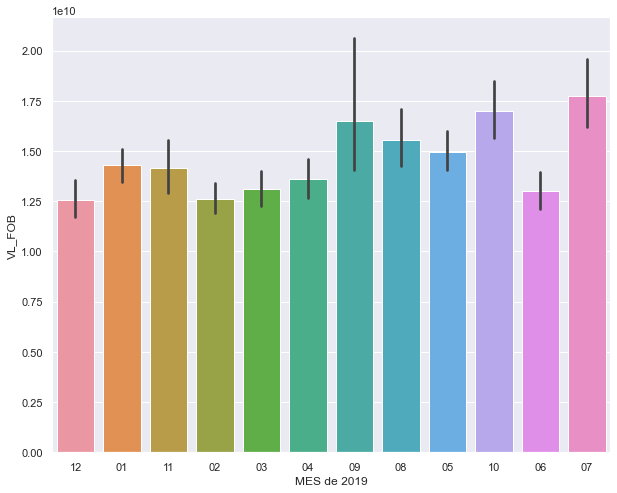

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x="MES de 2019", y="VL_FOB", data=df9, estimator=sum)

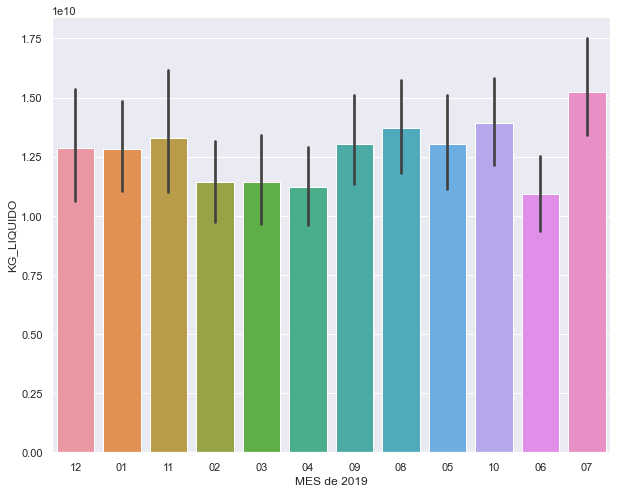

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x="MES de 2019", y="KG_LIQUIDO", data=df9, estimator=sum)

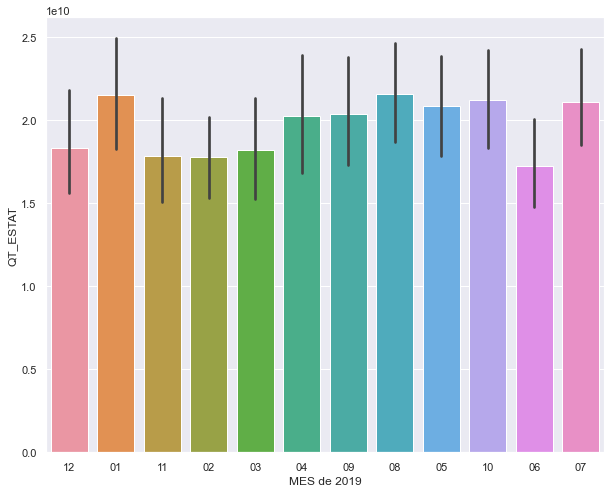

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x="MES de 2019", y="QT_ESTAT", data=df9, estimator=sum)

In [22]:
g1=df9.groupby("MES de 2019").sum()

In [23]:
g1=g1.drop(columns=["CO_NCM","câmbio_mês_atual","câmbio_mês_anterior"])

In [24]:
g1["MES de 2019"]=g1.index
#Foi necessário o presente comando para criar uma coluna com os meses (os quais figuravam apenas como índice, tendo em vista que estava dando erro para gerar o boxplot sobre g1.

In [25]:
g1

,QT_ESTAT,KG_LIQUIDO,VL_FOB,MES de 2019
MES de 2019,,,,
01,21533452282,12844515461,14288032497,01
02,17787697495,11439510640,12603817269,02
03,18231368975,11440204116,13111046470,03
04,20260360966,11205505096,13612173958,04
05,20841762748,13037064076,14955137288,05
06,17215696425,10910839328,13009113271,06
07,21123566451,15232827417,17734402100,07
08,21559461102,13726032127,15543767596,08
09,20362781016,13028185825,16484059742,09


De modo a permitir a comparação do VL_FOB, KG_LIQUIDO e QT_ESTAT entre os meses, plota-se o gráfico a seguir:

Destaque-se que a informação QT_ESTAT não é uma boa referência para a comparação entre os meses, tendo em vista que tal valor está associado aos códigos NCM das mercadorias importadas.
Existem mercadorias cuja unidade estatística é, por exemplo, a unidade ou o grama líquido, sendo que, para outras, tem-se a tonelada métrica líquida ou o milheiro.

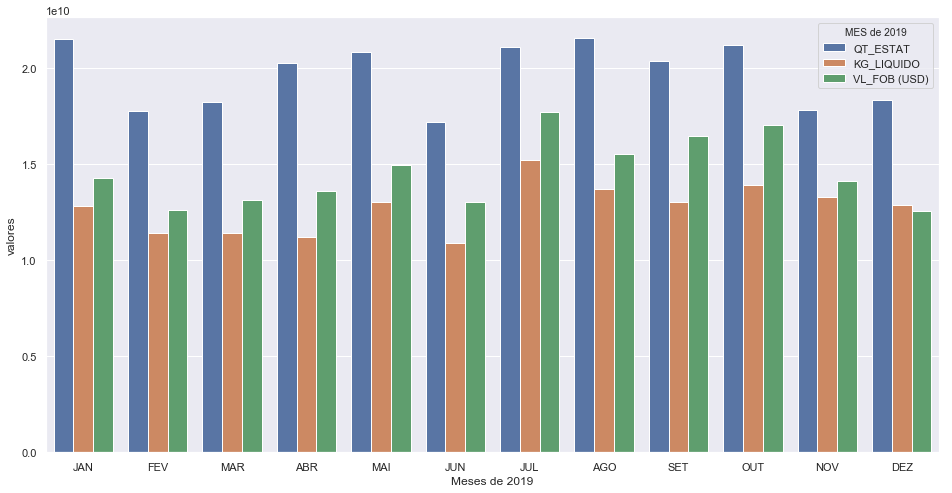

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

columns = ["Meses de 2019", "QT_ESTAT", "KG_LIQUIDO", "VL_FOB (USD)"]
test_data = pd.DataFrame.from_records([("JAN", 21533452282, 12844515461, 14288032497),\
("FEV", 17787697495, 11439510640, 12603817269),\
("MAR", 18231368975, 11440204116, 13111046470),\
("ABR", 20260360966, 11205505096, 13612173958),\
("MAI", 20841762748, 13037064076, 14955137288),\
("JUN", 17215696425, 10910839328, 13009113271),\
("JUL", 21123566451, 15232827417, 17734402100),\
("AGO", 21559461102, 13726032127, 15543767596),\
("SET", 20362781016, 13028185825, 16484059742),\
("OUT", 21202852979, 13925722653, 17014683521),\
("NOV", 17828249592, 13292157208, 14147763523),\
("DEZ", 18324632091, 12854839896, 12546527313)],\

                                       columns=columns)                              
                             
test_data_melted = pd.melt(test_data, id_vars=columns[0],\
                           var_name="MES de 2019", value_name="valores")
sns.set(rc={'figure.figsize':(16,8)})
g = sns.barplot(x=columns[0], y="valores",hue="MES de 2019", \
                data=test_data_melted)
plt.show()


In [17]:
g1

,QT_ESTAT,KG_LIQUIDO,VL_FOB,MES de 2019
MES de 2019,,,,
01,21533452282,12844515461,14288032497,01
02,17787697495,11439510640,12603817269,02
03,18231368975,11440204116,13111046470,03
04,20260360966,11205505096,13612173958,04
05,20841762748,13037064076,14955137288,05
06,17215696425,10910839328,13009113271,06
07,21123566451,15232827417,17734402100,07
08,21559461102,13726032127,15543767596,08
09,20362781016,13028185825,16484059742,09


In [18]:
g1.describe()

,QT_ESTAT,KG_LIQUIDO,VL_FOB
count,1.200000e+01,1.200000e+01,1.200000e+01
mean,1.968932e+10,1.274478e+10,1.458754e+10
std,1.666254e+09,1.285360e+09,1.769614e+09
min,1.721570e+10,1.091084e+10,1.254653e+10
25%,1.813059e+10,1.144003e+10,1.308556e+10
50%,2.031157e+10,1.294151e+10,1.421790e+10
75%,2.114339e+10,1.340063e+10,1.577884e+10
max,2.155946e+10,1.523283e+10,1.773440e+10


Cabe destacar que, náo obstante agosto tenha sido o mês que foi importada a maior quantidade de mercadoria na unidade de medida estatística, o mês com o maior peso em mercadorias importadas e que também com o maior valor em importações foi julho. Tal fato deve-se à heterogeneidade das mercadorias que são importadas. 

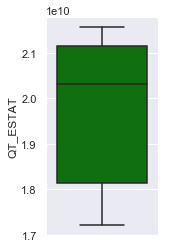

In [19]:
sns.set(rc={'figure.figsize':(2,4)})
ax1 = sns.boxplot(y=g1["QT_ESTAT"],color="green")

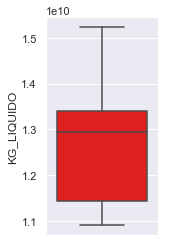

In [20]:
sns.set(rc={'figure.figsize':(2,4)})
ax1 = sns.boxplot(y=g1["KG_LIQUIDO"],color="red")

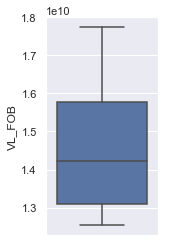

In [21]:
sns.set(rc={'figure.figsize':(2,4)})
ax1 = sns.boxplot(y=g1["VL_FOB"])

Os gráficos "boxplot" evidenciam que as variáveis "KG_LIQUIDO" e "VL_FOB" têm os seus máximos (que conforme já mencionado se deram no mês de julho) mais descolados da mediana em relação à variável "QT_ESTAT". 

In [22]:
#código interessante, mas usar para outros dados
#fig, ax = plt.subplots()
#for a in [g1["QT_ESTAT"], g1["KG_LIQUIDO"], g1["VL_FOB"]]:
 #   sns.distplot(a, ax=ax,bins=12, kde=False)

# Análises referentes às mercadorias importadas (coluna CO_NCM e derivada NO_NCM_POR)

In [29]:
#Para facilitar, será criada uma única coluna com o código NCM, a respectiva descrição e a unidade de medida estatística.
df9["NCM"]=df9["CO_NCM"].astype(str) + " - " + df9["NO_NCM_POR"].astype(str) + " - " + df9["SG_UNID"]

In [30]:
df9.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ..."
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c..."
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias..."
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã..."


In [31]:
g2=df9.groupby("NCM").sum()

In [32]:
g2

,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
NCM,,,,,,
"10011100 - Trigo duro, para semeadura - KGL",40044400,15.045331,15.367432,1456034,1456034,716413
"10011900 - Trigo duro, exceto para semeadura - KGL",120142800,48.298413,47.890681,78101651,78101651,16648968
"10019100 - Outrros trigos e misturas de trigo com centeio, para semeadura - KGL",10019100,4.120900,4.019382,440,440,1018
"10019900 - Outros trigos e misturas de trigo com centeio, exceto para semeadura - KGL",3356666500,1324.110265,1315.702626,6496745275,6496745275,1473853400
"10031000 - Cevada, para semeadura - KGL",20062000,7.753783,7.846802,2000,2000,1790
...,...,...,...,...,...,...
"97020000 - Gravuras, estampas e litografias, originais - UNID.",2231460000,89.981852,89.017093,151,602,612274
"97030000 - Produções originais de arte estatuária ou de escultura, de quaisquer matérias - UNID.",8538640000,349.811643,347.593575,344,34960,17017455
"97040000 - Selos postais, selos fiscais, marcas postais, envelopes de primeiro dia (first-day covers), inteiros postais e semelhantes, obliterados, ou não obliterados, exceto os artigos da posição 49.07 - KGL",1067440000,43.224772,42.954452,6546,6546,529214


In [33]:
g2=g2.drop(columns=["CO_NCM","câmbio_mês_atual","câmbio_mês_anterior"])

In [34]:
g2.head()

,QT_ESTAT,KG_LIQUIDO,VL_FOB
NCM,,,
"10011100 - Trigo duro, para semeadura - KGL",1456034,1456034,716413
"10011900 - Trigo duro, exceto para semeadura - KGL",78101651,78101651,16648968
"10019100 - Outrros trigos e misturas de trigo com centeio, para semeadura - KGL",440,440,1018
"10019900 - Outros trigos e misturas de trigo com centeio, exceto para semeadura - KGL",6496745275,6496745275,1473853400
"10031000 - Cevada, para semeadura - KGL",2000,2000,1790


In [35]:
g2["VL_POR_UN_MED_ESTAT"]=g2["VL_FOB"]/g2["QT_ESTAT"]

In [36]:
# Mercadorias que foram mais importadas (de acordo com a unidade ne medida estatística).
g2.sort_values(by=["QT_ESTAT","KG_LIQUIDO"],ascending=False).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT
NCM,,,,
"85322410 - Outros condensadores fixos, com dielétrico de cerâmica, de camadas múltiplas, próprios para montagem em superfície (SMD - Surface Mounted Device) - UNID.",39018036142,693506,175318016,0.004493
"85332120 - Resistências elétricas fixas, para potência não superior a 20 W, para montagem em superfície - UNID.",25210403982,423258,39411685,0.001563
"27011200 - Hulha betuminosa, não aglomerada - KGL",19653680832,19653680832,2721928933,0.138495
31042090 - Outros cloretos de potássio - KGL,10279649744,10279649744,3354075014,0.326283
85045000 - Outras bobinas de reatância e de auto-indução - UNID.,8428584211,3900359,116929261,0.013873
"10019900 - Outros trigos e misturas de trigo com centeio, exceto para semeadura - KGL",6496745275,6496745275,1473853400,0.226860
"31021010 - Ureia, mesmo em solução aquosa, com teor de nitrogênio (azoto) superior a 45 %, em peso, calculado sobre o produto anidro no estado seco - KGL",5585548143,5585548143,1529013827,0.273745
27112100 - Gás natural no estado gasoso - KGL,5206250397,5206250397,1293127127,0.248380
"40151900 - Outras luvas de borracha vulcanizada, não endurecida - PARES",4059304156,44909339,195005309,0.048039


A listagem acima contém as mercadorias que, de acordo com as respectivas unidades de medida estatística, foram as mais importadas. Cumpre destacar que as mercadorias mais importadas possuem um baixo valor unitário, conforme coluna derivada VL_POR_UN_MED_ESTAT (valores em USD por unidade na medida estatística).

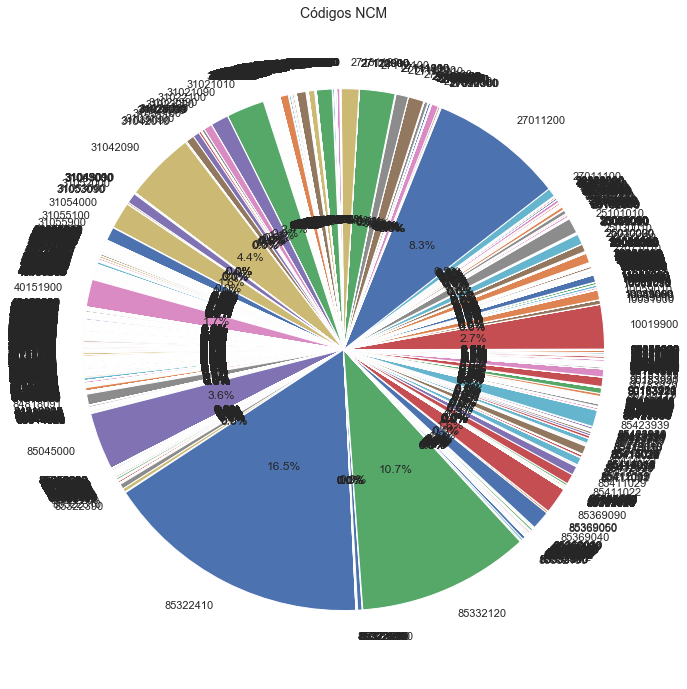

In [31]:
#tentativa de reproduzir graficamente os códigos NCM mais importados (conforme QT_ESTAT)
g2["Código NCM"]=g2.index.astype(str).str[:8]
pie, ax = plt.subplots(figsize=[20,12])
labels = g2["Código NCM"]
plt.pie(x=g2["QT_ESTAT"], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Códigos NCM", fontsize=14);

Uma alternativa para viabilizar a representação gráfica é o agrupamento por subposição da NCM (quatro primeiros dígitos). Optar-se-á por tal estudo ao final da análise corrente.

Considerando que o gráfico de pizza/torta contendo os subitens NCM (código de 8 dígitos) dificulta a visualização, em função da qtde de códigos distintos, serão listados os percentuais (QT_ESTAT) das mercadorias mais importadas em relação ao total:

In [37]:
g2["% QT_ESTAT"]=g2["QT_ESTAT"]/sum(g2["QT_ESTAT"])*100

In [38]:
g2.sort_values(by=["% QT_ESTAT"],ascending=False).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,% QT_ESTAT
NCM,,,,,
"85322410 - Outros condensadores fixos, com dielétrico de cerâmica, de camadas múltiplas, próprios para montagem em superfície (SMD - Surface Mounted Device) - UNID.",39018036142,693506,175318016,0.004493,16.514041
"85332120 - Resistências elétricas fixas, para potência não superior a 20 W, para montagem em superfície - UNID.",25210403982,423258,39411685,0.001563,10.670082
"27011200 - Hulha betuminosa, não aglomerada - KGL",19653680832,19653680832,2721928933,0.138495,8.318248
31042090 - Outros cloretos de potássio - KGL,10279649744,10279649744,3354075014,0.326283,4.350772
85045000 - Outras bobinas de reatância e de auto-indução - UNID.,8428584211,3900359,116929261,0.013873,3.567324
"10019900 - Outros trigos e misturas de trigo com centeio, exceto para semeadura - KGL",6496745275,6496745275,1473853400,0.226860,2.749690
"31021010 - Ureia, mesmo em solução aquosa, com teor de nitrogênio (azoto) superior a 45 %, em peso, calculado sobre o produto anidro no estado seco - KGL",5585548143,5585548143,1529013827,0.273745,2.364034
27112100 - Gás natural no estado gasoso - KGL,5206250397,5206250397,1293127127,0.248380,2.203500
"40151900 - Outras luvas de borracha vulcanizada, não endurecida - PARES",4059304156,44909339,195005309,0.048039,1.718065


In [34]:
top15Qtde = g2.sort_values(by=["% QT_ESTAT"],ascending=False).head(15)

In [35]:
top15Qtde[["% QT_ESTAT"]]

,% QT_ESTAT
NCM,
"85322410 - Outros condensadores fixos, com dielétrico de cerâmica, de camadas múltiplas, próprios para montagem em superfície (SMD - Surface Mounted Device) - UNID.",16.514041
"85332120 - Resistências elétricas fixas, para potência não superior a 20 W, para montagem em superfície - UNID.",10.670082
"27011200 - Hulha betuminosa, não aglomerada - KGL",8.318248
31042090 - Outros cloretos de potássio - KGL,4.350772
85045000 - Outras bobinas de reatância e de auto-indução - UNID.,3.567324
"10019900 - Outros trigos e misturas de trigo com centeio, exceto para semeadura - KGL",2.749690
"31021010 - Ureia, mesmo em solução aquosa, com teor de nitrogênio (azoto) superior a 45 %, em peso, calculado sobre o produto anidro no estado seco - KGL",2.364034
27112100 - Gás natural no estado gasoso - KGL,2.203500
"40151900 - Outras luvas de borracha vulcanizada, não endurecida - PARES",1.718065


In [36]:
sum(top15Qtde["% QT_ESTAT"])

60.16161293564455

In [37]:
g2["Código NCM"].nunique()

8413

Conforme cálculo acima, as 15 mercadorias importadas em maior quantidade respondem por 60,16% do total. Se considerarmos que foram 8413 códigos NCM importados, tem-se evidenciada a grande representatividade dos 15 códigos em comento.

In [38]:
# Mercadorias que foram menos importadas (de acordo com a unidade ne medida estatística).
g2.sort_values(by=["QT_ESTAT","KG_LIQUIDO"],ascending=True).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
"85211089 - Outros aparelhos videofônicos de gravação ou de reprodução, em cassete, para fitas de largura inferior a 19,05 mm (3/4"") - UNID.",1,0,30,30.0,85211089,4.232412e-10
"85401100 - Tubos catódicos para receptores de televisão, incluindo os tubos para monitores de vídeos, a cores (policromo) - UNID.",1,0,198,198.0,85401100,4.232412e-10
"85404000 - Tubos de visualização de dados gráficos, em monocromos; tubos de visualização de dados gráficos, a cores (policromo), com uma tela fosfórica de espaçamento entre os pontos inferior a 0,4 mm - UNID.",1,0,1808,1808.0,85404000,4.232412e-10
"91111000 - Caixas de relógios, de metais preciosos ou de metais folheados ou chapeados de metais preciosos (plaquê) - UNID.",1,0,402,402.0,91111000,4.232412e-10
"25261000 - Esteatita natural, mesmo desbastada ou simplesmente cortada a serra ou por outro meio, em blocos ou placas de forma quadrada ou retangular, não triturada nem em pó - KGL",1,1,51,51.0,25261000,4.232412e-10
28047030 - Fósforo negro - KGL,1,1,400,400.0,28047030,4.232412e-10
28121400 - Pentacloreto de fósforo - KGL,1,1,39,39.0,28121400,4.232412e-10
28352920 - Fosfato de cobalto - KGL,1,1,480,480.0,28352920,4.232412e-10
29029030 - Antraceno - KGL,1,1,97,97.0,29029030,4.232412e-10


In [39]:
# Checando, por amostragem aleatória, confiabilidade dos dados acima.
df9[df9["CO_NCM"]==29396911]

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM
690079,02,29396911,Maleato de metilergometrina,MG,KGL,"Tcheca, República",AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,3.723025,3.741055,1,1,14899,29396911 - Maleato de metilergometrina - KGL


Acerca das mercadorias que (de acordo com a unidade de medida estatística) foram menos importadas, embora existam importações de elevado valor unitário, náo necessariamente essa é a regra.

In [40]:
# Mercadorias cujas importações perfazem o maior peso.
g2.sort_values(by=["KG_LIQUIDO","QT_ESTAT"],ascending=False).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
"27011200 - Hulha betuminosa, não aglomerada - KGL",19653680832,19653680832,2721928933,0.138495,27011200,8.318248
27101921 - Gasóleo (óleo diesel) - M3,15321680,11082751383,6687359498,436.463854,27101921,0.006485
31042090 - Outros cloretos de potássio - KGL,10279649744,10279649744,3354075014,0.326283,31042090,4.350772
27090010 - Óleos brutos de petróleo - M3,332146509,9398297541,4654699560,14.013995,27090010,0.140578
"10019900 - Outros trigos e misturas de trigo com centeio, exceto para semeadura - KGL",6496745275,6496745275,1473853400,0.226860,10019900,2.749690
"31021010 - Ureia, mesmo em solução aquosa, com teor de nitrogênio (azoto) superior a 45 %, em peso, calculado sobre o produto anidro no estado seco - KGL",5585548143,5585548143,1529013827,0.273745,31021010,2.364034
27101241 - Naftas para petroquimica - M3,9970626,5356833872,2912461681,292.104195,27101241,0.004220
27112100 - Gás natural no estado gasoso - KGL,5206250397,5206250397,1293127127,0.248380,27112100,2.203500
"31054000 - Diidrogeno-ortofosfato de amônio (fosfato monoamônico ou monoamoniacal), mesmo misturado com hidrogeno-ortofosfato de diamônio (fosfato diamônico ou diamoniacal) - KGL",3895241992,3895241992,1420113811,0.364577,31054000,1.648627


Em relação às mercadorias mais importadas (em peso), destacam-se as substâncias químicas, mormente aquelas derivadas do petróleo. Outra observação pertinente é que, dentre as 30 mercadorias listadas acima, todas elas têm uma unidade de massa ou volume como unidade de medida estatística, destacando-se o quilograma líquido (KGL). 

In [41]:
# Mercadorias cujas importações perfazem o menor peso.
g2.sort_values(by=["KG_LIQUIDO","QT_ESTAT"],ascending=True).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
"85211089 - Outros aparelhos videofônicos de gravação ou de reprodução, em cassete, para fitas de largura inferior a 19,05 mm (3/4"") - UNID.",1,0,30,30.000000,85211089,4.232412e-10
"85401100 - Tubos catódicos para receptores de televisão, incluindo os tubos para monitores de vídeos, a cores (policromo) - UNID.",1,0,198,198.000000,85401100,4.232412e-10
"85404000 - Tubos de visualização de dados gráficos, em monocromos; tubos de visualização de dados gráficos, a cores (policromo), com uma tela fosfórica de espaçamento entre os pontos inferior a 0,4 mm - UNID.",1,0,1808,1808.000000,85404000,4.232412e-10
"91111000 - Caixas de relógios, de metais preciosos ou de metais folheados ou chapeados de metais preciosos (plaquê) - UNID.",1,0,402,402.000000,91111000,4.232412e-10
"84751000 - Máquinas para montagem de lâmpadas, tubos ou válvulas, elétricos ou eletrônicos, ou de lâmpadas de luz relâmpago (flash), que tenham invólucro de vidro - UNID.",2,0,306,153.000000,84751000,8.464824e-10
"90171010 - Mesas e máquinas de desenhar, automáticas - UNID.",2,0,674,337.000000,90171010,8.464824e-10
"71023100 - Diamantes não industriais, em bruto ou simplesmente serrados, clivados ou desbastados - QUILT",6,0,1783,297.166667,71023100,2.539447e-09
"85409140 - Painel de vidro, máscara de sombra e blindagem interna, reunidos, para tubos tricromáticos - UNID.",6,0,292,48.666667,85409140,2.539447e-09
"61151013 - Meias-calças, de malha, de lã ou de pelos finos - UNID.",16,0,132,8.250000,61151013,6.771860e-09


Acerca das mercadorias importadas em menor peso, identifica-se a presença de pedras preciosas (principlamente diamante) e substâncias químicas.

Cumpre destacar que algumas mercadorias constam tanto na pesquisa "códigos NCM importados em menor quantidade na unidade de medida estatística" e "códigos NCM cujas importações perfazem o menor peso".
Já em se tratando das pesquisas "códigos NCM importados em maior quantidade na unidade de medida estatística" tem-se em destaque os componentes eletrônicos enquanto que na pesquisa "códigos NCM cujas importações perfazem o maior peso" tem-se predominantemente substâncias químicas, destacando-se aquelas derivadas do petóleo.

In [42]:
# Mercadorias com maior valor total importado (de acordo com o compilado do VL_FOB por código NCM)
g2.sort_values(by=["VL_FOB"],ascending=False).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
27101921 - Gasóleo (óleo diesel) - M3,15321680,11082751383,6687359498,4.364639e+02,27101921,6.484767e-03
27090010 - Óleos brutos de petróleo - M3,332146509,9398297541,4654699560,1.401400e+01,27090010,1.405781e-01
83071090 - Outros tubos flexíveis de ferro ou aço - KGL,296362664,296362664,3551741175,1.198444e+01,83071090,1.254329e-01
31042090 - Outros cloretos de potássio - KGL,10279649744,10279649744,3354075014,3.262830e-01,31042090,4.350772e+00
27101241 - Naftas para petroquimica - M3,9970626,5356833872,2912461681,2.921042e+02,27101241,4.219980e-03
"27011200 - Hulha betuminosa, não aglomerada - KGL",19653680832,19653680832,2721928933,1.384946e-01,27011200,8.318248e+00
"87042190 - Outros veículos automóveis com motor diesel, para carga <= 5 toneladas - UNID.",105976,226371129,2709393230,2.556610e+04,87042190,4.485341e-05
85177099 - Outras partes para aparelhos de telefonia/telegrafia - KGL,11321729,11321729,2226833810,1.966867e+02,85177099,4.791822e-03
"89052000 - Plataformas de perfuração ou de exploração, flutuantes ou submersíveis - UNID.",6,140890980,2129727386,3.549546e+08,89052000,2.539447e-09


O resultado da consulta pelos códigos NCM cuja totalidade das importações perfaz o maior valor importado apresenta como retorno algumas mercadorias que figuraram também na pesquisa anterior (maior peso), destacando-se entre elas os derivados de petróleo.

A seguir serão consultadas as mercadorias cujas importações perfazem o menor valor importado e, na sequência, verificar-se-á a correlação entre as variáveis QT_ESTAT, KG_LIQUIDO e VL_FOB.

In [43]:
# Mercadorias com menor valor total importado (de acordo com o compilado do VL_FOB por código NCM)
g2.sort_values(by=["VL_FOB"],ascending=True).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
"48026910 - Outros papéis e cartões, em que mais de 10 %, em peso, do conteúdo total de fibras seja constituído por fibras obtidas por processo mecânico ou químico-mecânico, em tiras de largura < 15 cm ou em folhas em que nenhum lado exceda 360 mm,quando não dobradas - KGL",1,1,2,2.000000,48026910,4.232412e-10
69051000 - Telhas de cerâmica - KGL,12,12,4,0.333333,69051000,5.078895e-09
22043000 - Outros mostos de uvas - LITRO,5,5,10,2.000000,22043000,2.116206e-09
"84073190 - Outros motores de explosão para veículos do capítulo 87, de cilindrada não superior a 50 cm3 - UNID.",1,9,17,17.000000,84073190,4.232412e-10
14042090 - Outros línteres de algodão - KGL,2,2,29,14.500000,14042090,8.464824e-10
"85211089 - Outros aparelhos videofônicos de gravação ou de reprodução, em cassete, para fitas de largura inferior a 19,05 mm (3/4"") - UNID.",1,0,30,30.000000,85211089,4.232412e-10
"29239060 - Halogenetos de pentametil-alquil-propilenodiamônio, com grupo alquila de C6 a C22 - KGL",1,1,33,33.000000,29239060,4.232412e-10
95061100 - Esquis para esquiar na neve - PARES,1,5,36,36.000000,95061100,4.232412e-10
28121400 - Pentacloreto de fósforo - KGL,1,1,39,39.000000,28121400,4.232412e-10


In [44]:
g2["QT_ESTAT"].corr(g2["VL_FOB"])

0.20841627507726473

In [45]:
g2["KG_LIQUIDO"].corr(g2["VL_FOB"])

0.697389048414412

Iremos checar as correlações no âmbito do df original (df9) e também no agrupado por ano (g1):

<AxesSubplot:>

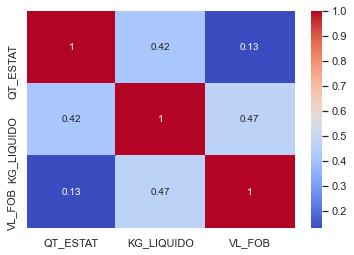

In [40]:
# correlação entre as variáveis QT_ESTAT, KG_LIQUIDO e VL_FOB no âmbito de df9 (dados sem agrupamentos)
sns.heatmap(df9[["QT_ESTAT","KG_LIQUIDO","VL_FOB"]].corr(),cmap="coolwarm", annot=True)

<AxesSubplot:>

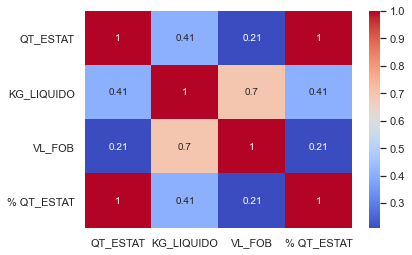

In [39]:
# correlação entre as variáveis QT_ESTAT, KG_LIQUIDO e VL_FOB no âmbito de g2 (dados agrupados por código NCM -> 8413 registros)
sns.heatmap(g2.drop(columns=["VL_POR_UN_MED_ESTAT"]).corr(),cmap="coolwarm", annot=True)

<AxesSubplot:>

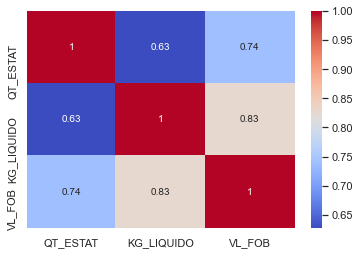

In [41]:
# correlação entre as variáveis QT_ESTAT, KG_LIQUIDO e VL_FOB no âmbito de g1 (dados agrupados por mês do ano 2019 -> 12 registros)
sns.heatmap(g1.corr(),cmap="coolwarm", annot=True)

Os dados anteriores, mais do que evidenciar a correlação entre o peso e o valor FOB importado (algo que, implicitamente, já tínhamos suspeitas em função das pesquisas realizadas), chama atenção para algo que poderá ser útil na sequência dos trabalhos. Trata-se da baixa correlação quando se comparam os dados na base original (provavelmente devido à alta granularidade), em contraste com o aumento da correlação à medida que se agrupam os dados (por exemplo, o agrupamento por mês (g1) tem correlações entre as variáveis melhores que o agrupamento por código NCM (g2) e esse, por sua vez, apresenta correlações melhores que a o dataframe sem agrupamentos (df9).

No âmbito da análise corrente (dados agrupados por código NCM), segue o diagrama de dispersão entre as variáveis KG_LIQUIDO e VL_FOB:

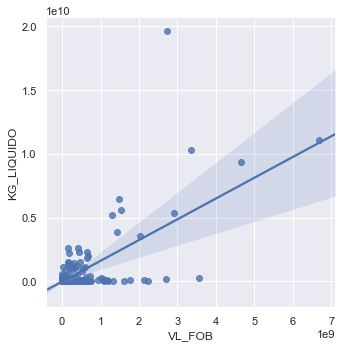

In [49]:
sns.lmplot(x='VL_FOB',y='KG_LIQUIDO',data=g2)

Retomando a análise das mercadorias (códigos NCM) importados ao longo de 2019, segue verificação das mercadorias com maior valor unitário:


In [50]:
# Mercadorias com maior valor unitário (de acordo com a razão entre o compilado do VL_FOB pelo compilado da QT_ESTAT)
g2.sort_values(by=["VL_POR_UN_MED_ESTAT"],ascending=False).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
"89052000 - Plataformas de perfuração ou de exploração, flutuantes ou submersíveis - UNID.",6,140890980,2129727386,3.549546e+08,89052000,2.539447e-09
"84178020 - Fornos industriais para fusão de vidro, não elétricos - UNID.",2,13975822,36415673,1.820784e+07,84178020,8.464824e-10
"88024090 - Outros aviões e outros veículos aéreos, de peso superior a 15.000 kg, vazios - UNID.",10,381000,152896613,1.528966e+07,88024090,4.232412e-09
"88023039 - Aviões e outros veículos aéreos, a turbojato, 7000 kg < peso <= 15000 kg, vazios - UNID.",5,58746,62347880,1.246958e+07,88023039,2.116206e-09
"88021290 - Helicópteros, de peso maior que 3500 kg, vazios - UNID.",3,7805,34176240,1.139208e+07,88021290,1.269724e-09
84021100 - Caldeiras aquatubulares com produção de vapor superior a 45 t por hora - UNID.,11,28335426,119369678,1.085179e+07,84021100,4.655653e-09
"89059000 - Barcos-faróis/guindastes/docas/diques flutuantes, etc. - UNID.",20,59467795,191008718,9.550436e+06,89059000,8.464824e-09
"84068100 - Outras turbinas a vapor, de potência superior a 40 MW - UNID.",8,618249,55538879,6.942360e+06,84068100,3.385930e-09
"86031000 - Litorinas, mesmo para circulação urbana, exceto as da posição 86.04, de fonte externa de eletricidade - UNID.",9,1247559,49827336,5.536371e+06,86031000,3.809171e-09


In [43]:
p1=g2.sort_values(by=["VL_POR_UN_MED_ESTAT"],ascending=False).head(30)

In [44]:
p1["NCM"]=p1.index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '89052000 - Plataformas de perfuração ou de exploração, flutuantes ou submersíveis - UNID.'),
  Text(1, 0, '84178020 - Fornos industriais para fusão de vidro, não elétricos - UNID.'),
  Text(2, 0, '88024090 - Outros aviões e outros veículos aéreos, de peso superior a 15.000 kg, vazios - UNID.'),
  Text(3, 0, '88023039 - Aviões e outros veículos aéreos, a turbojato, 7000 kg < peso <= 15000 kg, vazios - UNID.'),
  Text(4, 0, '88021290 - Helicópteros, de peso maior que 3500 kg, vazios - UNID.'),
  Text(5, 0, '84021100 - Caldeiras aquatubulares com produção de vapor superior a 45 t por hora - UNID.'),
  Text(6, 0, '89059000 - Barcos-faróis/guindastes/docas/diques flutuantes, etc. - UNID.'),
  Text(7, 0, '84068100 - Outras turbinas a vapor, de potência superior a 40 MW - UNID.'),
  Text(8, 0, '86031000 - Litorinas, mesmo para circulação urban

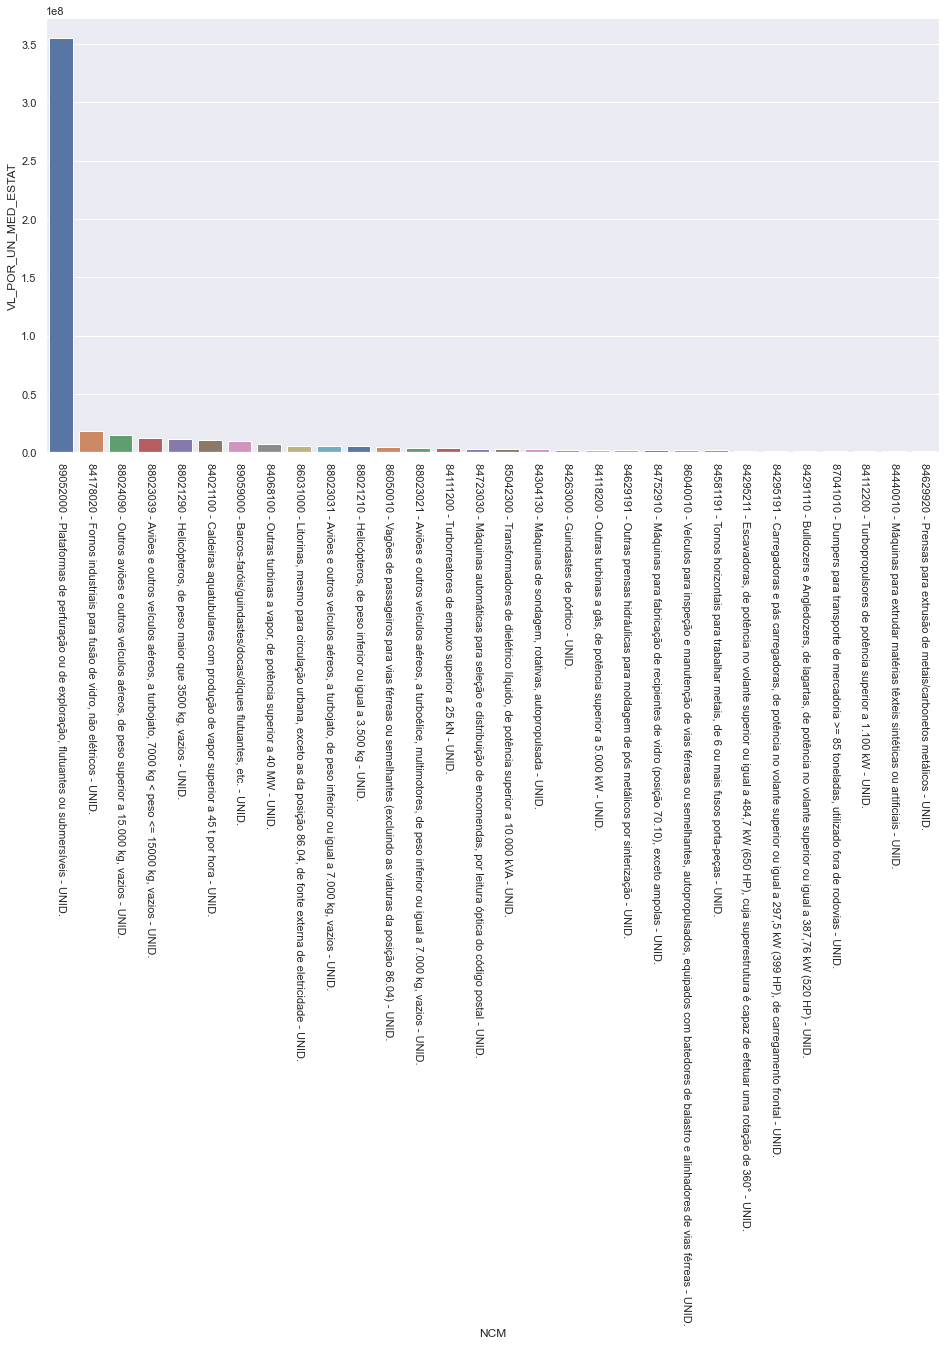

In [47]:
#representação gráfica dos 30 códigos NCM com maior valor unitário:
sns.barplot(x=p1["NCM"], y=p1["VL_POR_UN_MED_ESTAT"], palette="deep")
sns.set(rc={'figure.figsize':(16,8)})
plt.xticks(rotation=270)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

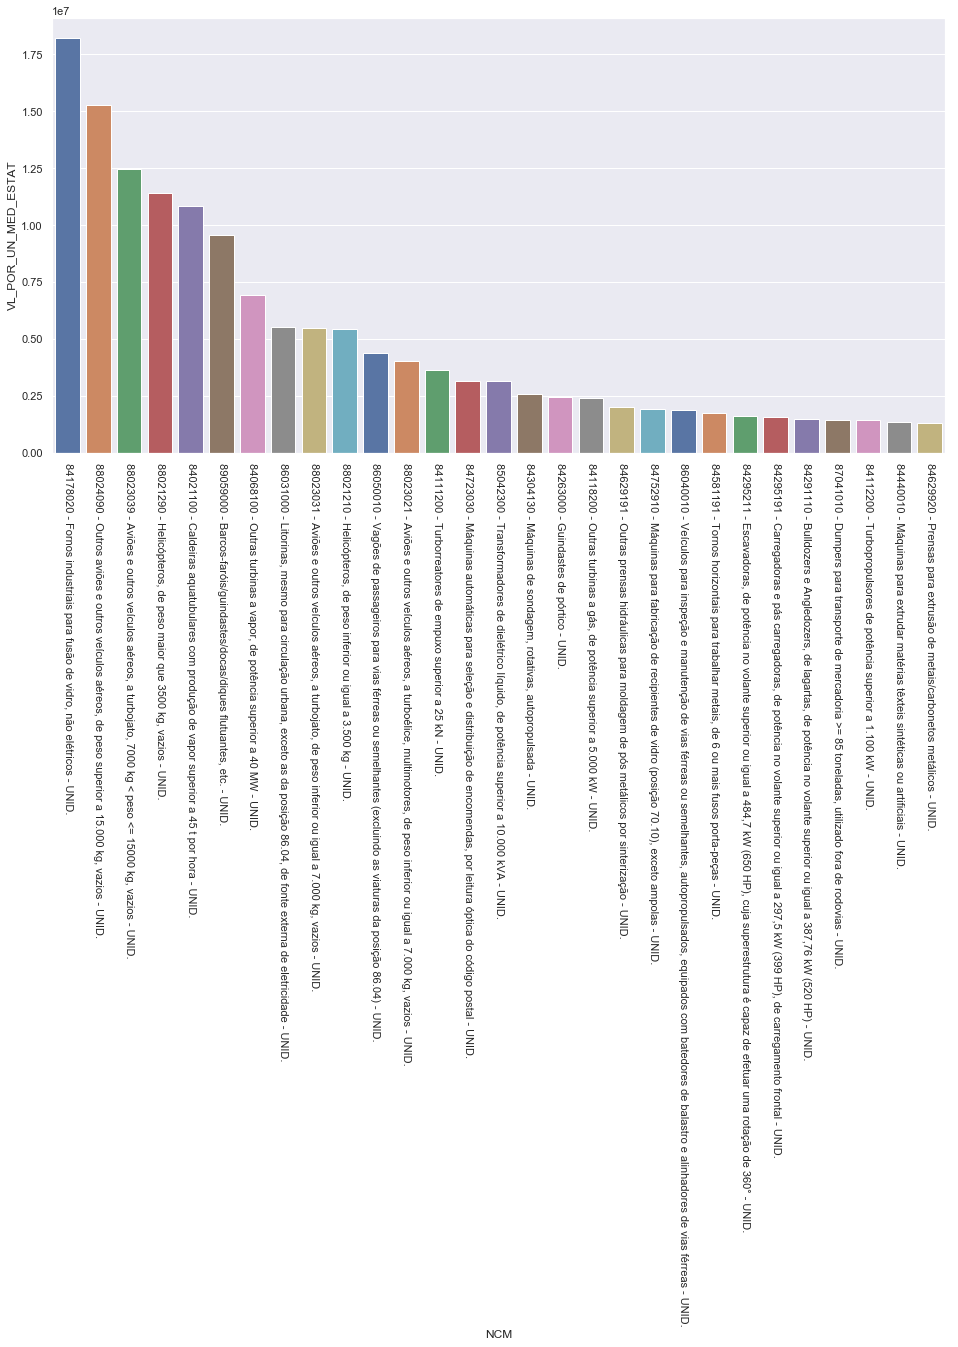

In [54]:
# A mercadoria com maior valor unitário acima destoa das demais, motivo pelo qual plotaremos novo gráfico para maior detalhamento das demais.
p2=p1[p1["NCM"]!="89052000 - Plataformas de perfuração ou de exploração, flutuantes ou submersíveis - UNID."]
sns.barplot(x=p2["NCM"], y=p2["VL_POR_UN_MED_ESTAT"], palette="deep")
sns.set(rc={'figure.figsize':(16,8)})
plt.xticks(rotation=270)

In [55]:
# Mercadorias com menor valor unitário (de acordo com a razão entre o compilado do VL_FOB pelo compilado da QT_ESTAT)
g2.sort_values(by=["VL_POR_UN_MED_ESTAT"],ascending=True).head(30)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_POR_UN_MED_ESTAT,Código NCM,% QT_ESTAT
NCM,,,,,,
"85332120 - Resistências elétricas fixas, para potência não superior a 20 W, para montagem em superfície - UNID.",25210403982,423258,39411685,0.001563,85332120,10.670082
"85331000 - Resistências elétricas fixas de carbono, aglomeradas ou de camada - UNID.",658297630,87752,2250364,0.003418,85331000,0.278619
"85322410 - Outros condensadores fixos, com dielétrico de cerâmica, de camadas múltiplas, próprios para montagem em superfície (SMD - Surface Mounted Device) - UNID.",39018036142,693506,175318016,0.004493,85322410,16.514041
"85322310 - Condensadores fixos com dielétrico de cerâmica, de uma só camada, próprios para montagem em superfície (SMD - Surface Mounted Device) - UNID.",549300150,24458,2478139,0.004511,85322310,0.232486
"71011000 - Pérolas naturais, não montadas, nem engastadas - GRAMA",528510,529,3065,0.005799,71011000,0.000224
85232110 - Cartôes magnéticos não gravados - UNID.,43444558,27443,258203,0.005943,85232110,0.018388
"85066090 - Outras pilhas e baterias de pilhas, elétricas, ar-zinco - UNID.",9959923,89311,83347,0.008368,85066090,0.004215
"71039900 - Outras pedras preciosas (exceto diamantes) ou semipreciosas, trabalhadas de outro modo - QUILT",169015432,57757,1510066,0.008934,71039900,0.071534
"85369050 - Terminais de conexão para capacitores, mesmo montados em suporte isolante, para uma tensão não superior a 1.000 V - UNID.",296418320,133896,2893736,0.009762,85369050,0.125456


A pesquisa pelas mercadorias com maior valor unitário importadas em 2019 retorna predominantemente aeronaves, embarcações e máquinas. Destaque-se que o resultado da consulta trouxe basicamente mercadorias cuja unidade de medida estatística é a unidade.

Por sua vez, a pesquisa pelas importações de menor valor unitário retornou, em grande parte, componentes eletro-eletrônicos (didos, resistores, etc.)

# Análises referentes às mercadorias importadas (agrupando por POSIÇÃO da NCM)

In [56]:
df10=df9

In [57]:
df10.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ..."
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c..."
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias..."
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã..."


In [58]:
df10["CO_SH4"]=df10["CO_NCM"].astype(str).str[:4]

In [59]:
df10.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM,CO_SH4
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ...",8504
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c...",8518
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias...",3926
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...,3824
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã...",3402


In [60]:
df10=df10.drop(columns=["CO_NCM","NO_NCM_POR","NCM"])

In [61]:
df10.head()

,MES de 2019,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_SH4
0,12,SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,8504
1,12,GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,8518
2,12,SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,3926
3,12,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,3824
4,12,BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,3402


In [62]:
#obtendo dataset com as descrições das subposições (quatro primeiros dígitos) NCM
sh4=pd.read_csv("NCM_SH.csv",sep=";", encoding="latin")

In [63]:
#excluindo as colunas que não nos interessam no presente momento (o que se busca é apenas o texto das subposições)
sh4.columns

Index(['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP',
       'NO_SEC_ING'],
      dtype='object')

In [64]:
sh4=sh4.drop(columns=['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP',
       'NO_SEC_ING'])

In [65]:
sh4.head()

,CO_SH4,NO_SH4_POR
0,101,"Cavalos, asininos e muares, vivos"
1,101,"Cavalos, asininos e muares, vivos"
2,101,"Cavalos, asininos e muares, vivos"
3,101,"Cavalos, asininos e muares, vivos"
4,101,"Cavalos, asininos e muares, vivos"


In [66]:
sh4["CO_SH4"]=sh4["CO_SH4"].astype(str).str.zfill(4)

In [67]:
sh4.head()

,CO_SH4,NO_SH4_POR
0,0101,"Cavalos, asininos e muares, vivos"
1,0101,"Cavalos, asininos e muares, vivos"
2,0101,"Cavalos, asininos e muares, vivos"
3,0101,"Cavalos, asininos e muares, vivos"
4,0101,"Cavalos, asininos e muares, vivos"


In [68]:
sh4 = sh4.drop_duplicates()

In [69]:
sh4.head()

,CO_SH4,NO_SH4_POR
0,0101,"Cavalos, asininos e muares, vivos"
8,0102,Animais vivos da espécie bovina
14,0103,Animais vivos da espécie suína
17,0104,Animais vivos das espécies ovina e caprina
19,0105,"Galos, galinhas, patos, gansos, perus, peruas ..."


In [70]:
df10.head()

,MES de 2019,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_SH4
0,12,SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,8504
1,12,GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,8518
2,12,SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,3926
3,12,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,3824
4,12,BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,3402


In [71]:
g3=df10.groupby("CO_SH4").sum()

In [72]:
g3.head()

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
CO_SH4,,,,,
1001,1391.574908,1382.980121,6576303400,6576303400,1491219799
1003,177.329487,176.286058,671337272,671337272,189010489
1004,23.845473,23.630841,400550,400550,116993
1005,605.964273,603.634790,1459967537,1459967537,199211708
1006,3479.365117,3459.088133,751361632,751361632,244743168


In [73]:
g4=pd.merge(g3, sh4, how='left', on=["CO_SH4"])

In [74]:
g4.head()

,CO_SH4,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_SH4_POR
0,1001,1391.574908,1382.980121,6576303400,6576303400,1491219799,Trigo e mistura de trigo com centeio
1,1003,177.329487,176.286058,671337272,671337272,189010489,Cevada
2,1004,23.845473,23.630841,400550,400550,116993,Aveia
3,1005,605.964273,603.634790,1459967537,1459967537,199211708,Milho
4,1006,3479.365117,3459.088133,751361632,751361632,244743168,Arroz


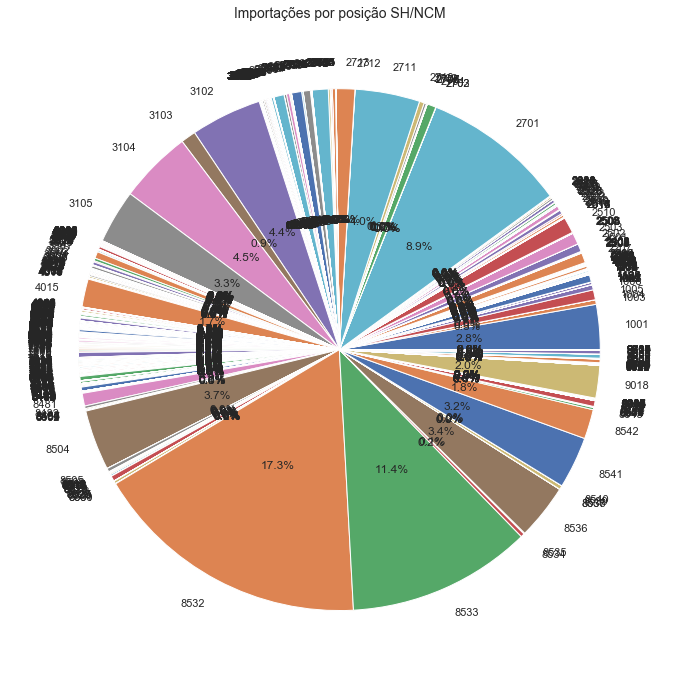

In [75]:
#tentativa de reproduzir graficamente as posições NCM mais importadas (conforme QT_ESTAT)
pie, ax = plt.subplots(figsize=[20,12])
labels = g4["CO_SH4"]
plt.pie(x=g4["QT_ESTAT"], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Importações por posição SH/NCM", fontsize=14);

Embora mais apresentável em relação ao mesmo gráfico plotado em se tratando das importações por subtitem da NCM (oito dígitos), ainda assim a representação deixa a desejar. Na sequência serão calculados os percentuais referente às posições (quatro dígitos) mais importadas:

In [76]:
g4["% QT_ESTAT"]=g4["QT_ESTAT"]/sum(g4["QT_ESTAT"])*100

In [77]:
g4.sort_values(by=["% QT_ESTAT"],ascending=False).head(30)

,CO_SH4,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_SH4_POR,% QT_ESTAT
1101,8532,46361.895783,46129.305298,40785589877,5333046,265048519,"Condensadores elétricos, fixos, variáveis ou a...",17.262143
1102,8533,53874.888765,53583.496024,26997645682,2044753,104574333,Resistências elétricas (incluídos os reóstatos...,11.426517
169,2701,1120.379139,1113.855680,21105235206,21105235206,2883371823,"Hulhas; briquetes, bolas e combustíveis sólido...",8.932606
316,3104,4272.643394,4246.521793,10668139029,10668139029,3466085091,"Adubos (fertilizantes) minerais ou químicos, p...",4.515196
314,3102,7107.111587,7077.378199,10378717491,10378717491,2404906821,"Adubos (fertilizantes) minerais ou químicos, a...",4.392701
179,2711,1065.476564,1058.224322,9479176337,9479176337,2623186889,Gás de petróleo e outros hidrocarbonetos gasosos,4.011978
1075,8504,100594.869158,100094.061142,8840742976,74841676,1052160417,"Transformadores elétricos, conversores elétric...",3.741767
1105,8536,171415.213308,170559.193878,8108393973,36040780,960091295,"Aparelhos para interrupção, seccionamento, pro...",3.431807
317,3105,7996.493163,7951.294272,7897863817,7897863817,2785147211,"Adubos (fertilizantes) minerais ou químicos, c...",3.342702
1110,8541,96423.298150,95926.620330,7586517568,272363609,1492562768,"Díodos, transístores e dispositivos semelhante...",3.210927


In [78]:
top15QtdeP = g4.sort_values(by=["% QT_ESTAT"],ascending=False).head(15)

In [79]:
top15QtdeP[["% QT_ESTAT"]].sum()

% QT_ESTAT    73.807105
dtype: float64

In [80]:
g4["CO_SH4"].nunique(len)

1263

Verifica-se que, dentre os 1263 possíveis códigos de posição NCM, 15 deles são responsáveis por 73,80% da quantidade de mercadoria importada em 2019.

In [81]:
top15QtdeP[["CO_SH4","NO_SH4_POR","% QT_ESTAT"]]

,CO_SH4,NO_SH4_POR,% QT_ESTAT
1101,8532,"Condensadores elétricos, fixos, variáveis ou a...",17.262143
1102,8533,Resistências elétricas (incluídos os reóstatos...,11.426517
169,2701,"Hulhas; briquetes, bolas e combustíveis sólido...",8.932606
316,3104,"Adubos (fertilizantes) minerais ou químicos, p...",4.515196
314,3102,"Adubos (fertilizantes) minerais ou químicos, a...",4.392701
179,2711,Gás de petróleo e outros hidrocarbonetos gasosos,4.011978
1075,8504,"Transformadores elétricos, conversores elétric...",3.741767
1105,8536,"Aparelhos para interrupção, seccionamento, pro...",3.431807
317,3105,"Adubos (fertilizantes) minerais ou químicos, c...",3.342702
1110,8541,"Díodos, transístores e dispositivos semelhante...",3.210927


# Análises referentes às mercadorias importadas (agrupando por CAPÍTULO da NCM)

In [82]:
df11=df9

In [83]:
df11.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM,CO_SH4
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ...",8504
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c...",8518
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias...",3926
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...,3824
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã...",3402


In [84]:
df11["CO_NCM"]=df11["CO_NCM"].astype(str).str.zfill(8)

In [85]:
df11["CO_SH2"]=df11["CO_NCM"].astype(str).str[:2]

In [86]:
df11.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM,CO_SH4,CO_SH2
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ...",8504,85
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c...",8518,85
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias...",3926,39
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...,3824,38
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã...",3402,34


In [87]:
df11=df11.drop(columns=["CO_NCM","NO_NCM_POR","CO_SH4"])

In [88]:
df11.head()

,MES de 2019,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM,CO_SH2
0,12,SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ...",85
1,12,GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c...",85
2,12,SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias...",39
3,12,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...,38
4,12,BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã...",34


In [89]:
#obtendo dataset com as descrições dos capítulos (dois primeiros dígitos) NCM
sh2=pd.read_csv("NCM_SH.csv",sep=";", encoding="latin")

In [90]:
#excluindo as colunas que não nos interessam no presente momento (o que se busca é apenas o texto das subposições)
sh2.columns

Index(['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP',
       'NO_SEC_ING'],
      dtype='object')

In [91]:
sh2=sh2.drop(columns=['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING', 'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP',
       'NO_SEC_ING'])

In [92]:
sh2.head()

,CO_SH2,NO_SH2_POR
0,1,Animais vivos
1,1,Animais vivos
2,1,Animais vivos
3,1,Animais vivos
4,1,Animais vivos


In [93]:
sh2=sh2.drop_duplicates()

In [94]:
sh2["CO_SH2"]=sh2["CO_SH2"].astype(str).str.zfill(2)

In [95]:
sh2.head()

,CO_SH2,NO_SH2_POR
0,01,Animais vivos
43,02,"Carnes e miudezas, comestíveis"
117,03,"Peixes e crustáceos, moluscos e outros inverte..."
397,04,Leite e lacticínios; ovos de aves; mel natural...
431,05,"Outros produtos de origem animal, não especifi..."


In [96]:
df11.head()

,MES de 2019,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM,CO_SH2
0,12,SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ...",85
1,12,GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c...",85
2,12,SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias...",39
3,12,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...,38
4,12,BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã...",34


In [97]:
g5=df11.groupby("CO_SH2").sum()

In [98]:
g5.head()

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
CO_SH2,,,,,
01,647.677165,643.082710,62656,263063,13711933
02,4205.516330,4182.408976,54445426,54445426,283924903
03,13092.600618,13043.482692,318523317,318019334,1216994025
04,6454.059534,6419.103025,139889302,139790054,477446695
05,2673.640822,2662.059968,45074762,38016269,258934872


In [99]:
g6=pd.merge(g5, sh2, how='left', on=["CO_SH2"])

In [100]:
g6.head()

,CO_SH2,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_SH2_POR
0,01,647.677165,643.082710,62656,263063,13711933,Animais vivos
1,02,4205.516330,4182.408976,54445426,54445426,283924903,"Carnes e miudezas, comestíveis"
2,03,13092.600618,13043.482692,318523317,318019334,1216994025,"Peixes e crustáceos, moluscos e outros inverte..."
3,04,6454.059534,6419.103025,139889302,139790054,477446695,Leite e lacticínios; ovos de aves; mel natural...
4,05,2673.640822,2662.059968,45074762,38016269,258934872,"Outros produtos de origem animal, não especifi..."


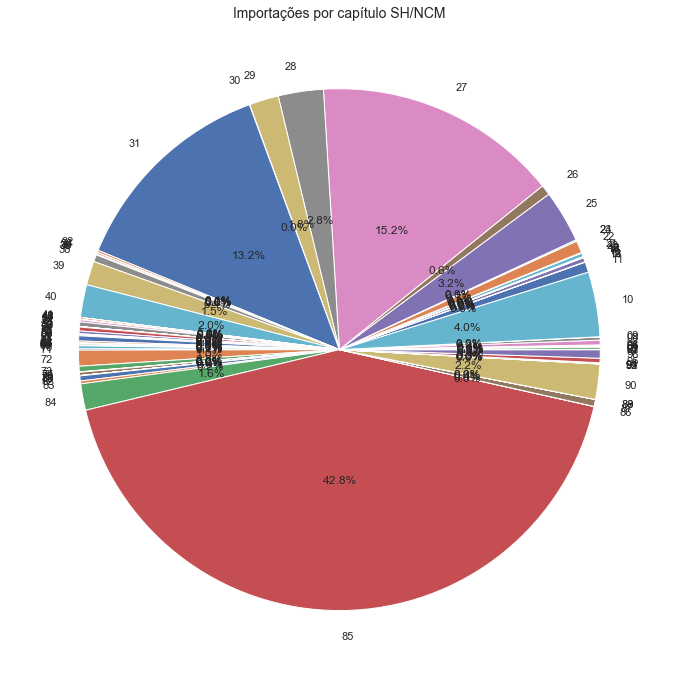

In [101]:
#tentativa de reproduzir graficamente os capítulos NCM mais importados (conforme QT_ESTAT)
pie, ax = plt.subplots(figsize=[20,12])
labels = g6["CO_SH2"]
plt.pie(x=g6["QT_ESTAT"], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Importações por capítulo SH/NCM", fontsize=14);

Embora mais apresentável em relação ao mesmo gráfico plotado em se tratando das importações por subtitem da NCM (oito dígitos) e por posição da NCM (quatro dígitos), ainda assim a representação deixa a desejar. Na sequência serão calculados os percentuais referente aos capítulos (dois dígitos) mais importados:

In [102]:
g6["% QT_ESTAT"]=g6["QT_ESTAT"]/sum(g6["QT_ESTAT"])*100

In [103]:
g6.sort_values(by=["% QT_ESTAT"],ascending=False).head(30)

,CO_SH2,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_SH2_POR,% QT_ESTAT
83,85,1.373086e+06,1.366295e+06,101058477464,1190549898,22080597665,"Máquinas, aparelhos e materiais elétricos, e s...",42.772113
26,27,2.426721e+04,2.413641e+04,35856132048,66100192693,23964309744,"Combustíveis minerais, óleos minerais e produt...",15.175793
30,31,2.110196e+04,2.099044e+04,31139982493,31139982493,9145652575,Adubos (fertilizantes),13.179724
9,10,6.493776e+03,6.458163e+03,9491496944,9491496944,2145871834,Cereais,4.017193
24,25,2.045186e+04,2.035814e+04,7675053566,7690478855,676320201,"Sal; enxofre; terras e pedras; gesso, cal e ci...",3.248399
27,28,7.834634e+04,7.796551e+04,6599517223,6523339407,2034524143,Produtos químicos inorgânicos; compostos inorg...,2.793188
88,90,4.744243e+05,4.720300e+05,5137887593,85223872,5318665393,"Instrumentos e aparelhos de óptica, de fotogra...",2.174566
39,40,2.320634e+05,2.308925e+05,4799683511,962354624,2968695458,Borracha e suas obras,2.031424
28,29,2.510806e+05,2.498279e+05,4299592361,4299592361,10914490595,Produtos químicos orgânicos,1.819765
82,84,1.445194e+06,1.437946e+06,3863912173,1523725244,21291251732,"Reatores nucleares, caldeiras, máquinas, apare...",1.635367


In [104]:
top15QtdeC = g6.sort_values(by=["% QT_ESTAT"],ascending=False).head(15)

In [105]:
top15QtdeC[["% QT_ESTAT"]].sum()

% QT_ESTAT    93.329484
dtype: float64

In [106]:
g6["CO_SH2"].nunique(len)

96

Verifica-se que, dentre os 96 possíveis códigos de capítulo NCM, 15 deles são responsáveis por 93,33% da quantidade de mercadoria importada em 2019.

In [107]:
top15QtdeC[["CO_SH2","NO_SH2_POR","% QT_ESTAT"]]

,CO_SH2,NO_SH2_POR,% QT_ESTAT
83,85,"Máquinas, aparelhos e materiais elétricos, e s...",42.772113
26,27,"Combustíveis minerais, óleos minerais e produt...",15.175793
30,31,Adubos (fertilizantes),13.179724
9,10,Cereais,4.017193
24,25,"Sal; enxofre; terras e pedras; gesso, cal e ci...",3.248399
27,28,Produtos químicos inorgânicos; compostos inorg...,2.793188
88,90,"Instrumentos e aparelhos de óptica, de fotogra...",2.174566
39,40,Borracha e suas obras,2.031424
28,29,Produtos químicos orgânicos,1.819765
82,84,"Reatores nucleares, caldeiras, máquinas, apare...",1.635367


In [108]:
# Segue outra representação gráfica do percentual (% QT_ESTAT) importado por capítulo:
g6["CO_SH2"]=g6["CO_SH2"].astype(str)
g6.head()

,CO_SH2,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_SH2_POR,% QT_ESTAT
0,01,647.677165,643.082710,62656,263063,13711933,Animais vivos,0.000027
1,02,4205.516330,4182.408976,54445426,54445426,283924903,"Carnes e miudezas, comestíveis",0.023044
2,03,13092.600618,13043.482692,318523317,318019334,1216994025,"Peixes e crustáceos, moluscos e outros inverte...",0.134812
3,04,6454.059534,6419.103025,139889302,139790054,477446695,Leite e lacticínios; ovos de aves; mel natural...,0.059207
4,05,2673.640822,2662.059968,45074762,38016269,258934872,"Outros produtos de origem animal, não especifi...",0.019077


# Análises referentes às mercadorias importadas (agrupando por SEÇÃO da NCM)

In [109]:
df12=df9

In [110]:
df12.head()

,MES de 2019,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,NCM,CO_SH4,CO_SH2
0,12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,"85044021 - Retificadores, exceto carregadores ...",8504,85
1,12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,"85183000 - Fones de ouvido, mesmo combinados c...",8518,85
2,12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,"39263000 - Guarnições para móveis, carrocerias...",3926,39
3,12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,38249929 - Outros derivados de ácidos graxos i...,3824,38
4,12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,"34021300 - Agentes orgânicos de superfície, nã...",3402,34


In [111]:
df12=df12.drop(columns=["CO_NCM","NO_NCM_POR","CO_SH4"])

In [112]:
#obtendo dataset com as descrições das Seções (agrupamento de capítulos) do SH/NCM
sh7=pd.read_csv("NCM_SH.csv",sep=";", encoding="latin")

In [113]:
#excluindo as colunas que não nos interessam no presente momento (o que se busca é apenas o texto das subposições)
sh7.head()

,CO_SH6,NO_SH6_POR,NO_SH6_ESP,NO_SH6_ING,CO_SH4,NO_SH4_POR,NO_SH4_ESP,NO_SH4_ING,CO_SH2,NO_SH2_POR,NO_SH2_ESP,NO_SH2_ING,CO_NCM_SECROM,NO_SEC_POR,NO_SEC_ESP,NO_SEC_ING
0,10110,"Animais vivos das espécies cavalar, asinina e ...","Caballos y asnos, reproductores de raza pura",Pure-bred breeding horses and asses,101,"Cavalos, asininos e muares, vivos","Caballos, asnos, mulos y burdéganos, vivos","Live horses, asses, mules and hinnies",1,Animais vivos,Animales vivos,Live animals,I,Animais vivos e produtos do reino animal,Animales vivos y productos del reino animal,Lives animals; Animal products
1,10111,"Cavalos reprodutores, de raça pura",Caballos reproductores de raza pura,Pure-bred breeding horses,101,"Cavalos, asininos e muares, vivos","Caballos, asnos, mulos y burdéganos, vivos","Live horses, asses, mules and hinnies",1,Animais vivos,Animales vivos,Live animals,I,Animais vivos e produtos do reino animal,Animales vivos y productos del reino animal,Lives animals; Animal products
2,10119,"Outros cavalos, vivos","Demás caballos, vivos",Other live horses,101,"Cavalos, asininos e muares, vivos","Caballos, asnos, mulos y burdéganos, vivos","Live horses, asses, mules and hinnies",1,Animais vivos,Animales vivos,Live animals,I,Animais vivos e produtos do reino animal,Animales vivos y productos del reino animal,Lives animals; Animal products
3,10120,Asininos e muares vivos,"Asnos, mulos y burdéganos, vivos","Asses, mules and hinnies (live)",101,"Cavalos, asininos e muares, vivos","Caballos, asnos, mulos y burdéganos, vivos","Live horses, asses, mules and hinnies",1,Animais vivos,Animales vivos,Live animals,I,Animais vivos e produtos do reino animal,Animales vivos y productos del reino animal,Lives animals; Animal products
4,10121,Cavalos reprodutores de raça pura,Caballos de raza selecta para reproducción,Pure-bred breeding horses,101,"Cavalos, asininos e muares, vivos","Caballos, asnos, mulos y burdéganos, vivos","Live horses, asses, mules and hinnies",1,Animais vivos,Animales vivos,Live animals,I,Animais vivos e produtos do reino animal,Animales vivos y productos del reino animal,Lives animals; Animal products


In [114]:
sh7.columns

Index(['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP',
       'NO_SEC_ING'],
      dtype='object')

In [115]:
sh7=sh7.drop(columns=['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING',  'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING',  'NO_SEC_ESP',
       'NO_SEC_ING'])

In [116]:
sh7=sh7.drop_duplicates()

In [117]:
sh7["CO_SH2"]=sh7["CO_SH2"].astype(str).str.zfill(2)

In [118]:
sh7.head()

,CO_SH2,CO_NCM_SECROM,NO_SEC_POR
0,01,I,Animais vivos e produtos do reino animal
43,02,I,Animais vivos e produtos do reino animal
117,03,I,Animais vivos e produtos do reino animal
397,04,I,Animais vivos e produtos do reino animal
431,05,I,Animais vivos e produtos do reino animal


In [119]:
g7=df12.groupby("CO_SH2").sum()

In [120]:
g7.head()

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
CO_SH2,,,,,
01,647.677165,643.082710,62656,263063,13711933
02,4205.516330,4182.408976,54445426,54445426,283924903
03,13092.600618,13043.482692,318523317,318019334,1216994025
04,6454.059534,6419.103025,139889302,139790054,477446695
05,2673.640822,2662.059968,45074762,38016269,258934872


In [121]:
g8=pd.merge(g7, sh7, how='left', on=["CO_SH2"])

In [122]:
g8.head()

,CO_SH2,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_NCM_SECROM,NO_SEC_POR
0,01,647.677165,643.082710,62656,263063,13711933,I,Animais vivos e produtos do reino animal
1,02,4205.516330,4182.408976,54445426,54445426,283924903,I,Animais vivos e produtos do reino animal
2,03,13092.600618,13043.482692,318523317,318019334,1216994025,I,Animais vivos e produtos do reino animal
3,04,6454.059534,6419.103025,139889302,139790054,477446695,I,Animais vivos e produtos do reino animal
4,05,2673.640822,2662.059968,45074762,38016269,258934872,I,Animais vivos e produtos do reino animal


In [123]:
g9=g8.groupby("CO_NCM_SECROM").sum()

In [124]:
g9["CO_NCM_SECROM"]=g9.index

In [125]:
g9.head()

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_NCM_SECROM
CO_NCM_SECROM,,,,,,
I,27073.494469,26950.137371,557995463,550534146,2251012428,I
II,73718.518336,73337.940952,12365094360,12383303251,4564352235,II
III,16009.446047,15923.361054,634242474,682037421,915508037,III
IV,97584.469890,97070.320631,2781841183,2559346922,3216390853,IV
IX,20913.784118,20807.685456,60077337,109295913,124322269,IX


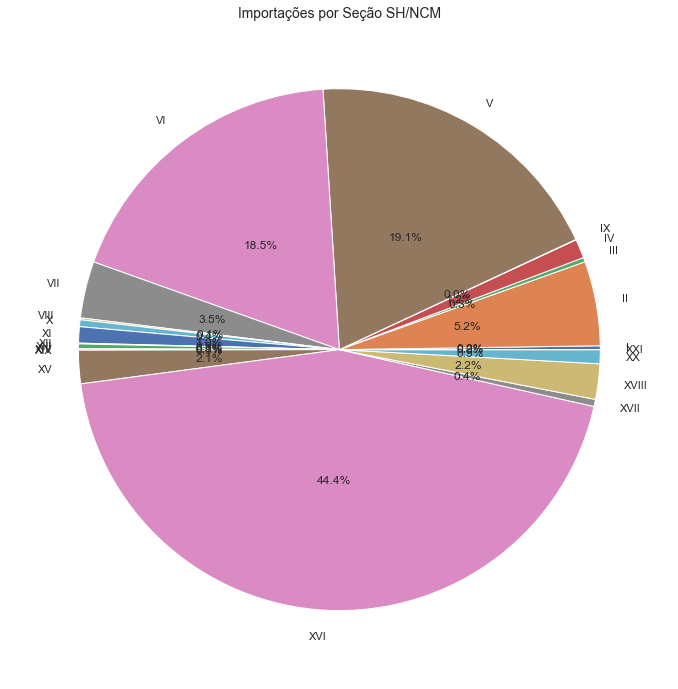

In [126]:
#tentativa de reproduzir graficamente as Seções NCM mais importados (conforme QT_ESTAT)
pie, ax = plt.subplots(figsize=[20,12])
labels = g9["CO_NCM_SECROM"]
plt.pie(x=g9["QT_ESTAT"], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Importações por Seção SH/NCM", fontsize=14);

Definitivamente, o gráfico em pizza/torta não se mostrou adequado a representação (tanto a nível de subitem, posição, capítulo e seção da NCM). Para melhorar a visualização, talvez fosse interessante agrupar as fatias menores em uma fatia residual ("outros).

In [127]:
g9["% QT_ESTAT"]=g9["QT_ESTAT"]/sum(g9["QT_ESTAT"])*100

In [128]:
g9.sort_values(by=["% QT_ESTAT"],ascending=False).head(30)

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_NCM_SECROM,% QT_ESTAT
CO_NCM_SECROM,,,,,,,
XVI,2.818281e+06,2.804241e+06,104922389637,2714275142,43371849397,XVI,44.407480
V,4.618724e+04,4.595503e+04,45031122559,75290608493,25842893708,V,19.059027
VI,7.170566e+05,7.134236e+05,43813651787,43727931570,37648944047,VI,18.543744
II,7.371852e+04,7.333794e+04,12365094360,12383303251,4564352235,II,5.233418
VII,6.440531e+05,6.407790e+05,8293735370,4456406483,10334734063,VII,3.510251
XVIII,5.027896e+05,5.002499e+05,5177389968,94291524,5560144303,XVIII,2.191285
XV,7.693143e+05,7.653713e+05,4878472006,4809220625,13308530402,XV,2.064770
IV,9.758447e+04,9.707032e+04,2781841183,2559346922,3216390853,IV,1.177390
XI,4.120500e+05,4.096650e+05,2378554047,1451220081,5409210119,XI,1.006702


In [129]:
# montar uma tabela com as descrições das seções e respectivos percentuais.
descSec = pd.read_csv("NCM_SH.csv",sep=";", encoding="latin")

In [130]:
descSec.columns

Index(['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP',
       'NO_SEC_ING'],
      dtype='object')

In [131]:
descSec=descSec.drop(columns=['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING', 'CO_SH4',
       'NO_SH4_POR', 'NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR',
       'NO_SH2_ESP', 'NO_SH2_ING',  'NO_SEC_ESP',
       'NO_SEC_ING'])

In [132]:
descSec=descSec.drop_duplicates()

In [133]:
descSec.head()

,CO_NCM_SECROM,NO_SEC_POR
0,I,Animais vivos e produtos do reino animal
448,II,Produtos do reino vegetal
826,III,Gorduras e óleos animais ou vegetais; Produtos...
882,IV,"Produtos das indútrias alimentares; Bebidas, l..."
1118,V,Produtos minerais


In [134]:
descSec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 6296
Data columns (total 2 columns):
CO_NCM_SECROM    22 non-null object
NO_SEC_POR       22 non-null object
dtypes: object(2)
memory usage: 528.0+ bytes


In [135]:
g9.head()

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_NCM_SECROM,% QT_ESTAT
CO_NCM_SECROM,,,,,,,
I,27073.494469,26950.137371,557995463,550534146,2251012428,I,0.236167
II,73718.518336,73337.940952,12365094360,12383303251,4564352235,II,5.233418
III,16009.446047,15923.361054,634242474,682037421,915508037,III,0.268438
IV,97584.469890,97070.320631,2781841183,2559346922,3216390853,IV,1.177390
IX,20913.784118,20807.685456,60077337,109295913,124322269,IX,0.025427


In [136]:
g9.index.rename('índice', inplace=True)

In [137]:
g10=pd.merge(g9, descSec, how='left', on=["CO_NCM_SECROM"])

In [138]:
g10.head()

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_NCM_SECROM,% QT_ESTAT,NO_SEC_POR
0,27073.494469,26950.137371,557995463,550534146,2251012428,I,0.236167,Animais vivos e produtos do reino animal
1,73718.518336,73337.940952,12365094360,12383303251,4564352235,II,5.233418,Produtos do reino vegetal
2,16009.446047,15923.361054,634242474,682037421,915508037,III,0.268438,Gorduras e óleos animais ou vegetais; Produtos...
3,97584.469890,97070.320631,2781841183,2559346922,3216390853,IV,1.177390,"Produtos das indútrias alimentares; Bebidas, l..."
4,20913.784118,20807.685456,60077337,109295913,124322269,IX,0.025427,"Madeira, carvão vegetal e obras de madeira; Co..."


In [139]:
g10["% QT_ESTAT"]=g10["QT_ESTAT"]/sum(g10["QT_ESTAT"])*100

In [140]:
top10QtdeSecNCM=g10.sort_values(by=["% QT_ESTAT"],ascending=False).head(9)

In [141]:
top10QtdeSecNCM["% QT_ESTAT"].sum()

97.19406679057275

In [150]:
# agrupar os percentuais inferior a 1% numa única fatia e plotar novo gráfico.
g10["agrupado"]=g10["CO_NCM_SECROM"]
def agrupado (g10):
    for i in g10.index:
        if g10["% QT_ESTAT"][i]>= 1:
            g10["agrupado"][i]=g10["CO_NCM_SECROM"][i]
        else:
            g10["agrupado"][i]="Demais"

In [152]:
agrupado(g10)

C:\Users\22781880892\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\22781880892\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [154]:
g10

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_NCM_SECROM,% QT_ESTAT,NO_SEC_POR,agrupado
0,2.707349e+04,2.695014e+04,557995463,550534146,2251012428,I,0.236167,Animais vivos e produtos do reino animal,Demais
1,7.371852e+04,7.333794e+04,12365094360,12383303251,4564352235,II,5.233418,Produtos do reino vegetal,II
2,1.600945e+04,1.592336e+04,634242474,682037421,915508037,III,0.268438,Gorduras e óleos animais ou vegetais; Produtos...,Demais
3,9.758447e+04,9.707032e+04,2781841183,2559346922,3216390853,IV,1.177390,"Produtos das indútrias alimentares; Bebidas, l...",IV
4,2.091378e+04,2.080769e+04,60077337,109295913,124322269,IX,0.025427,"Madeira, carvão vegetal e obras de madeira; Co...",Demais
5,4.618724e+04,4.595503e+04,45031122559,75290608493,25842893708,V,19.059027,Produtos minerais,V
6,7.170566e+05,7.134236e+05,43813651787,43727931570,37648944047,VI,18.543744,Produtos das indústrias químicas ou indústrias...,VI
7,6.440531e+05,6.407790e+05,8293735370,4456406483,10334734063,VII,3.510251,Plásticos e suas obras; Borracha e suas obras,VII
8,5.752656e+04,5.720827e+04,279449694,126364564,496898759,VIII,0.118275,"Peles, couros, peles com pelo e obras destas m...",Demais
9,1.089919e+05,1.084497e+05,1001752329,1001752329,1177994919,X,0.423983,Pastas de madeira ou de outras matérias fibros...,Demais


In [157]:
g11=g10.groupby("agrupado").sum()

In [158]:
g11

,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT
agrupado,,,,,,
Demais,8.819714e+05,8.774737e+05,6629631205,5450799752,25793475421,2.805933
II,7.371852e+04,7.333794e+04,12365094360,12383303251,4564352235,5.233418
IV,9.758447e+04,9.707032e+04,2781841183,2559346922,3216390853,1.177390
V,4.618724e+04,4.595503e+04,45031122559,75290608493,25842893708,19.059027
VI,7.170566e+05,7.134236e+05,43813651787,43727931570,37648944047,18.543744
VII,6.440531e+05,6.407790e+05,8293735370,4456406483,10334734063,3.510251
XI,4.120500e+05,4.096650e+05,2378554047,1451220081,5409210119,1.006702
XV,7.693143e+05,7.653713e+05,4878472006,4809220625,13308530402,2.064770
XVI,2.818281e+06,2.804241e+06,104922389637,2714275142,43371849397,44.407480


In [161]:
g11["% QT_ESTAT"].sum()

100.0

In [162]:
g11["agrupado"]=g11.index

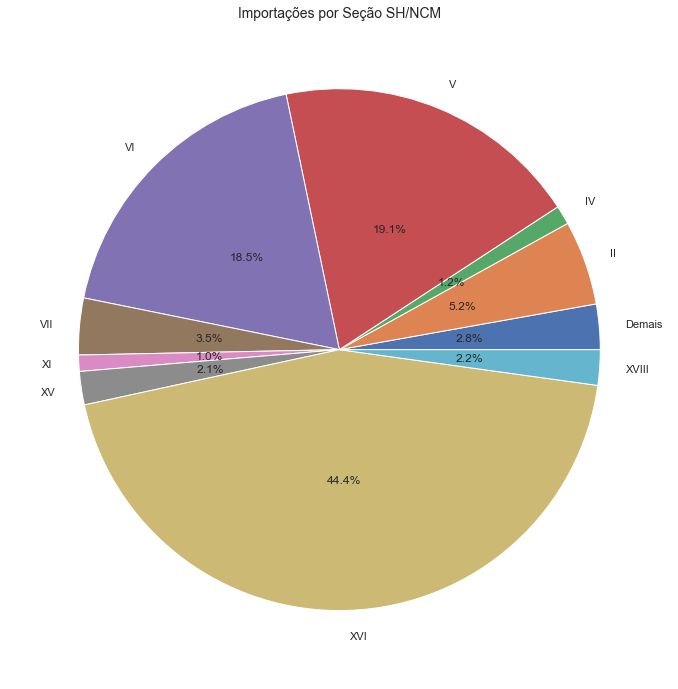

In [163]:
pie, ax = plt.subplots(figsize=[20,12])
labels = g11["agrupado"]
plt.pie(x=g11["QT_ESTAT"], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Importações por Seção SH/NCM", fontsize=14);

In [169]:
#renomeando a coluna "agrupado" para viabilizar o merge com o df descSec e, assim, obter as descrições das Seções mostradas no gráfico acima.
g11.rename(columns={'agrupado': 'CO_NCM_SECROM'}, inplace = True)

In [171]:
g12=pd.merge(g11, descSec, how='left', on=["CO_NCM_SECROM"])

In [177]:
#o retorno do "Demais" no agrupado foi NaN, pois ele não constava no df "descSec".
g12 = g12.fillna('Demais')

In [188]:
pd.set_option('max_colwidth',260)
g12.sort_values(by=["% QT_ESTAT"],ascending=False)[["% QT_ESTAT","CO_NCM_SECROM","NO_SEC_POR"]]

,% QT_ESTAT,CO_NCM_SECROM,NO_SEC_POR
8,44.407480,XVI,"Máquinas e aparelhos, material elétrico e suas partes; Aparelhos de gravação ou reprodução de som, aparelhos de gravação ou reprodução de imagens e de som em televisão, e suas partes e acessórios"
3,19.059027,V,Produtos minerais
4,18.543744,VI,Produtos das indústrias químicas ou indústrias conexas
1,5.233418,II,Produtos do reino vegetal
5,3.510251,VII,Plásticos e suas obras; Borracha e suas obras
0,2.805933,Demais,Demais
9,2.191285,XVIII,"Instrumentos e aparelhos de ótica, fotografia ou cinematografia, medida, controle ou de precisão; Instrumentos e aparelhos médico-cirúrgicos; Relógios e aparelhos semelhantes; Instrumentos musicais; Suas partes e acessórios"
7,2.064770,XV,Metais comuns e suas obras
2,1.177390,IV,"Produtos das indútrias alimentares; Bebidas, líquidos alcoólicos e vinagres; Tabaco e seus sucedâneos manufaturados"
6,1.006702,XI,Matérias têxteis e suas obras
